# Random Forest Regression

Objective: Prediction using Random Forest Regression   
Dataset: abalone.data

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('abalone.data', header=None)
print(data.shape)
data.head()

(4177, 9)


,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
data.columns = ['Sex','Length','Diameter','Height','WholeHeight','ShuckedWeight','VisceraWeight','ShellWeight','RingsAge']
data.head()

,Sex,Length,Diameter,Height,WholeHeight,ShuckedWeight,VisceraWeight,ShellWeight,RingsAge
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Check Null

In [3]:
data.isnull().sum()

Sex              0
Length           0
Diameter         0
Height           0
WholeHeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
RingsAge         0
dtype: int64

## Data Exploration

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


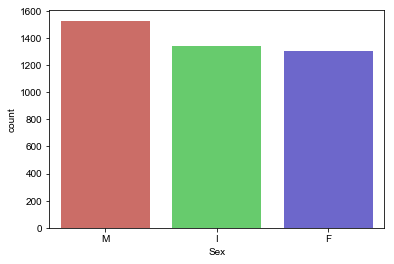

In [4]:
print(data['Sex'].value_counts())

sns.countplot(x='Sex',data = data, palette='hls',order = data['Sex'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Convert Categorical to Numerical

In [5]:
data["Sex"] = data["Sex"].astype('category')
data["Sex*"] = data["Sex"].cat.codes  

data.head()

,Sex,Length,Diameter,Height,WholeHeight,ShuckedWeight,VisceraWeight,ShellWeight,RingsAge,Sex*
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,2
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


## Correlation

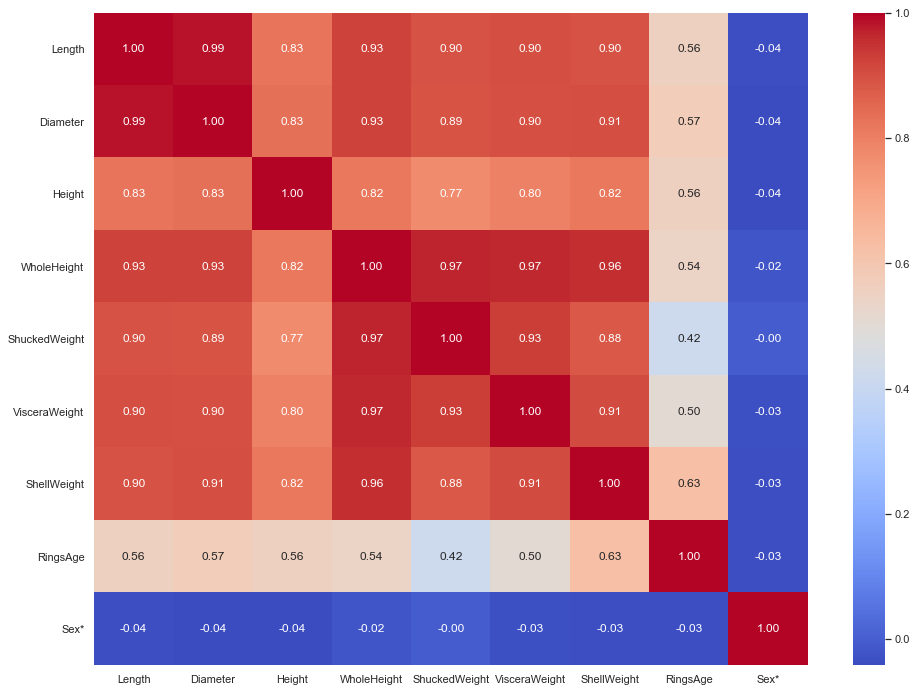

In [6]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [7]:
corr_rank = data.corr()
corr_rank["RingsAge"].sort_values(ascending=False)

RingsAge         1.000000
ShellWeight      0.627574
Diameter         0.574660
Height           0.557467
Length           0.556720
WholeHeight      0.540390
VisceraWeight    0.503819
ShuckedWeight    0.420884
Sex*            -0.034627
Name: RingsAge, dtype: float64

## Data Processing and Selection

In [8]:
X = data[['ShellWeight','Diameter','Height','Length','WholeHeight','VisceraWeight','ShuckedWeight','Sex*']].values
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (4177, 8)


array([[0.15  , 0.365 , 0.095 , 0.455 , 0.514 , 0.101 , 0.2245, 2.    ],
       [0.07  , 0.265 , 0.09  , 0.35  , 0.2255, 0.0485, 0.0995, 2.    ]])

In [9]:
y = data[['RingsAge']].values
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (4177, 1)


array([[15],
       [ 7],
       [ 9],
       [10],
       [ 7]], dtype=int64)

## Data Normalization

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (4177, 8)


array([[-0.63821689, -0.43214879, -1.06442415, -0.57455813, -0.64189823,
        -0.72621157, -0.60768536,  1.15198011],
       [-1.21298732, -1.439929  , -1.18397831, -1.44898585, -1.23027711,
        -1.20522124, -1.17090984,  1.15198011]])

## Split Train Test

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("X TRAIN Set: ", X_train.shape, y_train.shape)
print("X TEST Set : ", X_test.shape, y_test.shape)

X TRAIN Set:  (3341, 8) (3341, 1)
X TEST Set :  (836, 8) (836, 1)


## Random Forest Regression

In [12]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 

from sklearn import metrics
print("R-Square               :", round(metrics.r2_score(y_test, y_pred),4))
print('Mean Absolute Error    :', round(metrics.mean_absolute_error(y_test, y_pred),4))  
print('Mean Squared Error     :', round(metrics.mean_squared_error(y_test, y_pred),4))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4)) 
print("Accuracy score         :", round(regressor.score(X_test, y_test),4))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


R-Square               : 0.5297
Mean Absolute Error    : 1.5174
Mean Squared Error     : 4.6053
Root Mean Squared Error: 2.146
Accuracy score         : 0.5297


## Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(X_train, y_train)  
predicted = model.predict(X_test)

print("R-Square               :", round(metrics.r2_score(y_test, predicted),4))
print('Mean Absolute Error    :', round(metrics.mean_absolute_error(y_test, predicted),4))  
print('Mean Squared Error     :', round(metrics.mean_squared_error(y_test, predicted),4))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predicted)),4))
print("Accuracy score         :", round(model.score(X_test, y_test),4))

R-Square               : 0.3035
Mean Absolute Error    : 1.75
Mean Squared Error     : 6.8194
Root Mean Squared Error: 2.6114
Accuracy score         : 0.2297


D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


## Data Prediction

In [18]:
df_pred1 = data[data.index == 0]
df_pred2 = data[data.index == 4]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,Sex,Length,Diameter,Height,WholeHeight,ShuckedWeight,VisceraWeight,ShellWeight,RingsAge,Sex*
0,M,0.455,0.365,0.095,0.514,0.2245,0.1010,0.150,15,2
4,I,0.330,0.255,0.080,0.205,0.0895,0.0395,0.055,7,1


In [19]:
Xp = df_pred[['ShellWeight','Diameter','Height','Length','WholeHeight','VisceraWeight','ShuckedWeight','Sex*']].values
Xp = scaler.transform(Xp)

yp = df_pred[['RingsAge']].values

## Prediction using RF Regressor

In [20]:
RFR_pred = regressor.predict(Xp)
RFR_pred

array([12.81 ,  6.845])

## Prediction using RF Classifier

In [21]:
RFC_pred = model.predict(Xp)
RFC_pred

array([15,  7], dtype=int64)